# Support Vector Machines

"...using support vector machines (SVMs) to build a spam classifier"

## 1 Support Vector Machines

"In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets [to] help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs."

### 1.1 Example Dataset 1

#### Visualise the data

In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from sklearn import svm
import math
import re
import string

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [2]:
data = scipy.io.loadmat('data/ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X = data['X']
y = data['y']

In [4]:
# take a peek at the data
X[:5]

array([[ 1.9643,  4.5957],
       [ 2.2753,  3.8589],
       [ 2.9781,  4.5651],
       [ 2.932 ,  3.5519],
       [ 3.5772,  2.856 ]])

In [5]:
X.shape

(51, 2)

In [6]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [7]:
y.shape

(51, 1)

In [8]:
y = y.flatten() # makes plotting easier, required for scikit-learn

In [9]:
def plot_data(X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==0, 0], X[y==0, 1], c='y', marker='o')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='+')
    plt.show()

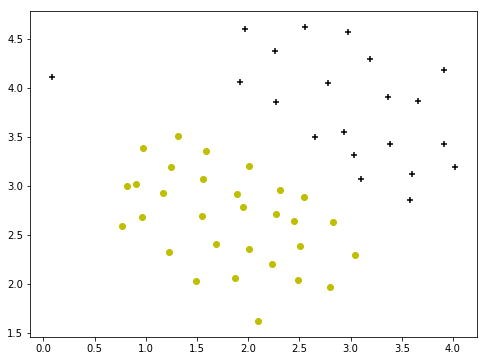

In [10]:
plot_data(X, y)

There's an obvious separarion indicated by the gap between the two classes, but there's also an outlying positive example (black plus) at ~(0.1, 4.1).

"As part of this exercise, you will also see how this outlier affects the SVM decision boundary."

#### Train linear SVM

The exercise provides a pre-written SVM training function written in Matlab/Octave. Until now I've been rewriting all the provided Matlab/Octave code in python, but this is becoming increasingly burdensome, so let's just use `scikit-learn`.

In [11]:
# Experiment with training the SVM with different values of regularisation parameter C.

model = svm.SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
def plot_boundary_linear(X, y, model):
    
    # Plot data
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==0, 0], X[y==0, 1], c='y', marker='o')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='+')

    # Plot decision boundary
    # https://stackoverflow.com/q/23794277/8291169
    # To plot decision boundary, y = a*x + b, do
    # weights W=svc.coef_[0]
    # intercept I=svc.intercept_
    # then
    # a = -W[0]/W[1]
    # b = -I[0]/W[1]
    
    a = -1 * model.coef_[0][0] / model.coef_[0][1]
    b = -1 * model.intercept_[0] / model.coef_[0][1]

    # https://stackoverflow.com/a/43811762/8291169
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = a * x_vals + b
    plt.plot(x_vals, y_vals, '--')

    plt.show()

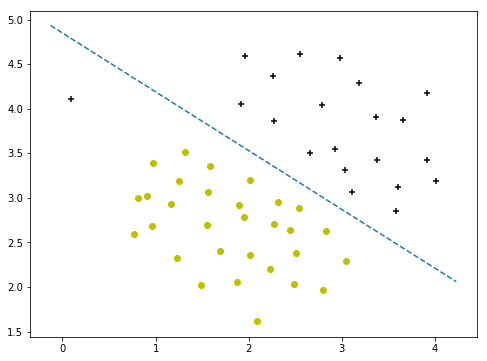

In [13]:
plot_boundary_linear(X, y, model)

The model has a good fit to the data, but wrongly predicts the outlier (not surprising). By increasing C we can increase the variance and deliberately overfit the data:

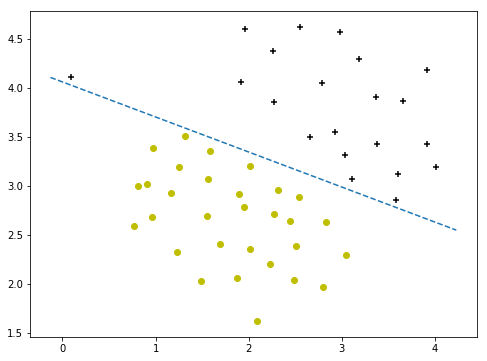

In [14]:
model = svm.SVC(kernel='linear', C=100)
model.fit(X, y)
plot_boundary_linear(X, y, model)

We've now deliberately overfit the data, and the outlier is predicted correctly, but the decision boundary seems less natural.

### 1.2 SVM with Gaussian Kernels

"...  using SVMs with Gaussian kernels on datasets that are not linearly separable."

#### 1.2.1 Gaussian Kernel

Build and test a Gaussian kernel:

In [15]:
def gaussian_kernel(x1, x2, sigma):
    '''
    Returns a gaussian kernel between x1 and x2
    and returns the value in sim
    '''
    
    sim = 0
    
    vec = x1 - x2
    mag = np.linalg.norm(vec)
    
    sim = math.exp(-1 * pow(mag, 2) / (2 * sigma**2))
    
    return sim

In [16]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussian_kernel(x1, x2, sigma)
print('%.6f' %sim)

# "...you should expect to see a value of 0.324652"

0.324652


#### 1.2.2 Example Dataset 2

In [17]:
data = scipy.io.loadmat('data/ex6data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [18]:
X = data['X']
y = data['y']

In [19]:
X[:5]

array([[ 0.107143 ,  0.60307  ],
       [ 0.093318 ,  0.649854 ],
       [ 0.0979263,  0.705409 ],
       [ 0.15553  ,  0.784357 ],
       [ 0.210829 ,  0.866228 ]])

In [20]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [21]:
y = y.flatten()

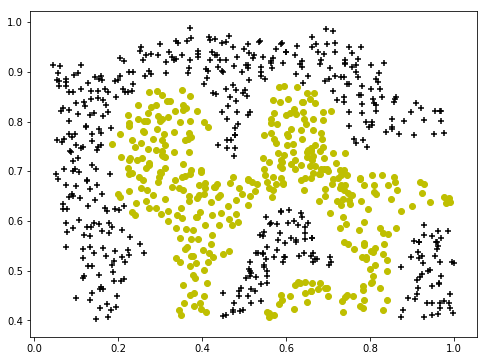

In [22]:
plot_data(X, y)

Non-linear decision boundary required, so we use a Gaussian kernel.

Getting `svm.SVC()` to work with my `gaussian_kernel()` function can be done, but is going to be inconvenient. `svm.SVC` has a built in Gaussian kernel called `rbf` (radial basis function) where the `gamma` parameter is equivalent to

`1 / 2 * sigma**2`

http://scikit-learn.org/stable/modules/svm.html#svm-kernels

so let's use that.

In [23]:
# sigma = 0.1 -> gamma = 50

model = svm.SVC(kernel='rbf', gamma=50, C=1)
model.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
def plot_boundary(X, y, model):
    
    # Based on the "official" plotting example from the scikit-learn people
    # http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
    
    X0 = X[:, 0]
    X1 = X[:, 1]
    
    ## Create grid of points to plot on
    x0_min, x0_max = X0.min() - 0.04, X0.max() + 0.04
    x1_min, x1_max = X1.min() - 0.04, X1.max() + 0.04
    
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.005),
                           np.arange(x1_min, x1_max, 0.005))
    # If you're having trouble visualising how meshgrid works:
    # https://stackoverflow.com/a/42404323/8291169
    
    
    ## Evaluate model predictions on grid
    z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    # This is a complicated bit of code!
    # np.c_ is just concatenation for slice objects (which our xx0 and xx1 are).
    # ravel just flattens, but uses less memory since it flattens the original
    # array rather than creating a copy like flatten().
    
    # z is flat, so need to reshape
    z = z.reshape(xx0.shape)
    
    ## And plot
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==0, 0], X[y==0, 1], c='y', marker='o')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='+')
    plt.contour(xx0, xx1, z, 1, colors='b')

    plt.show()

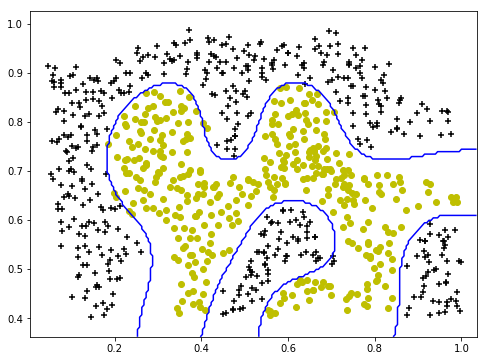

In [25]:
plot_boundary(X, y, model)

Using a Gaussian kernel we see that we can plot a non-linear boundary and achieve good separation between the two classes.

#### 1.2.3 Example Dataset 3

In [26]:
data = scipy.io.loadmat('data/ex6data3.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

We have both test data (X, y) and cross-validation data (Xval, yval).

In [27]:
X = data['X']
y = data['y']

Xval = data['Xval']
yval = data['yval']

In [28]:
X[:5]

array([[-0.158986,  0.423977],
       [-0.347926,  0.47076 ],
       [-0.504608,  0.353801],
       [-0.596774,  0.114035],
       [-0.518433, -0.172515]])

In [29]:
y[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [30]:
y = y.flatten()
yval = yval.flatten()

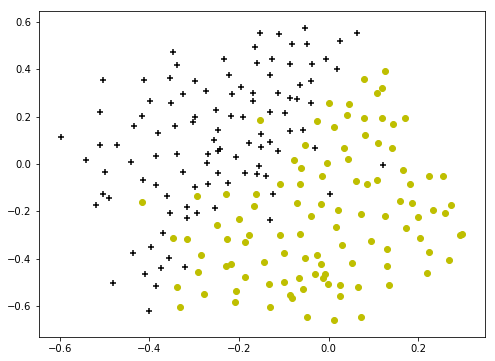

In [31]:
plot_data(X, y)

"Your task is to use the cross validation set Xval, yval to determine the best C and sigma [gamma in our case] parameter to use."

In [32]:
def dataset_3_params(X, y, Xval, yval):
    '''
    Trains an SVM on training data X, y.
    Returns optimal C, gamma, model based on evaluation
    of training on cross-validation data Xval, yval.
    '''
    
    accuracy_best = 0
    C_best = -1
    gamma_best = -1
    model_best = None
    
    # Try the following set of values for both C and sigma**2:
    vals = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    C_vals = vals
    gamma_vals = 1 / (2 * vals)
    
    # Train and evaluate the SVM using all combinations of C, gamma
    for C in C_vals:
        for gamma in gamma_vals:

            # Train SVM
            model = svm.SVC(kernel='rbf', gamma=gamma, C=C)
            model.fit(X, y)

            # Evaluate on cross validation set
            pred = model.predict(Xval)
            accuracy = np.mean(pred == yval)

            if accuracy > accuracy_best:
                accuracy_best = accuracy
                C_best = C
                gamma_best = gamma
                model_best = model
            
    print('Best result found at C = %.2f, gamma = %.2f, with accuracy = %.2f%%.'
          %(C_best, gamma_best, accuracy_best*100))

    return C_best, gamma_best, model_best

In [33]:
C, gamma, model = dataset_3_params(X, y, Xval, yval)

Best result found at C = 1.00, gamma = 50.00, with accuracy = 96.50%.


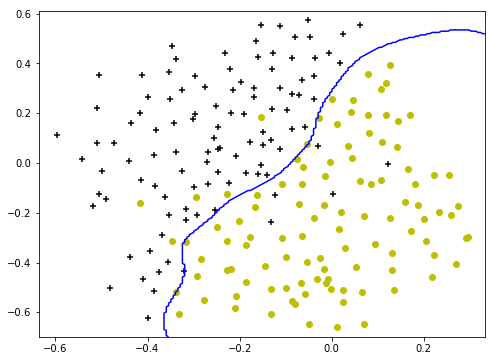

In [34]:
plot_boundary(X, y, model)

## 2 Spam Classification

"You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0)."

### 2.1 Preprocessing Emails

First we need to process the emails, using regexp normalisation, then map the contents of the email into a word indices vector.

In [35]:
file = open('data/emailSample1.txt')
file_contents = file.read()
file.close()

In [36]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

This is an example of the kind of data we are working with.

The exercise provides a vocabulary list that contains the 1899 most common words in the email spam corpus. Each word is associated with a number, which we will use for our word indices. The list is a .txt file formatted like so:


```
1	aa
2	ab
3	abil
...
1897	zdnet
1898	zero
1899	zip
```

i.e. newlines separating entries, tabs separating indices from words.

I have written `get_vocab_dict()` to load the file and convert it into a python dictionary.

In [37]:
def get_vocab_dict():
    '''
    Loads the provided vocab.txt, converts it into a python
    dictionary, and returns the dictionary.
    '''
    
    vocab_dict = {}
    
    file = open('data/vocab.txt')
    file_contents = file.readlines()
    file.close()

    for line in file_contents:
        index = line.split()[0]
        word = line.split()[1]
        
        # We're going to use this to look up indices based on words,
        # so make words the keys and indices the values
        vocab_dict[word] = index
    
    return vocab_dict

In [38]:
def process_email(email_contents):
    
    '''
    Preprocesses the body of an email (email_contents) and returns
    a list of indices of the words contained in the email.
    '''

    word_indices = []
    vocab_dict = get_vocab_dict()

    
    ## Preprocess email    
    # Make lower case
    email_contents = email_contents.lower()
    
    # Strip HTML
    # Find expressions that start with <, end with >, and do not
    # contain either < or > in the middle. Replace them with
    # a blank space.
    # Regex cheatsheet: https://www.debuggex.com/cheatsheet/regex/python
    email_contents = re.sub(r'<[^<>]+>', ' ', email_contents)
    
    # Numbers
    # Replace numbers with the word 'number'
    email_contents = re.sub(r'[0-9]+', 'number', email_contents)

    # URLs
    # Look for strings starting with http:// or https://
    # replace with 'httpaddr'
    email_contents = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email_contents)
    
    # Email addresses
    # Look for strings with @ in the middle, replace with 'emailaddr'
    email_contents = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email_contents)
    
    # $ sign
    # Replace with 'dollar'
    email_contents = re.sub(r'[$]+', 'dollar', email_contents)


    ## Create list of words in email
    words = email_contents.split()
    
    for word in words:
        # Remove punctuation
        word = word.translate(str.maketrans('','',string.punctuation))
    
        # Remove non-alphanumeric characters
        word = re.sub(r'[^a-zA-Z0-9]', '', word)
    
        # Stem word
        word = ps.stem(word)
        
        # Skip spaces, blank lines
        if len(word) < 1:
            continue
            
        # Look up the word in the dictionary and
        # add to word_indices if found
        if word in vocab_dict:
            word_indices.append(int(vocab_dict[word]))
        
    return word_indices

In [39]:
word_indices = process_email(file_contents)

# Check our result using Fig. 11 in ex6.pdf
print('Expected output:')
print('86 916 794 1077 883 370 1699 790 1822 1831 ...\n')
print('word_indices:')
print(word_indices[:10])

Expected output:
86 916 794 1077 883 370 1699 790 1822 1831 ...

word_indices:
[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831]


### 2.2 Extracting Features from Emails

Convert each email into a vector of features x in R^n, where n = 1899 is the number of words in our vocabulary list.

"x_i ∈ {0, 1} for an email corresponds to whether the i-th word in the dictionary occurs in the email. That is, x_i = 1 if the i-th word is in the email and x_i = 0 if the i-th word is not present in the email."

NB - unlike Matlab/Octave (which this course was designed for), in Python our feature vector will run from 0-1898 rather than 1-1899, so we'll be off by one which we'll have to compensate for.

In [40]:
def email_features(word_indices):
    
    '''
    Takes in a word_indices vector and 
    produces a feature vector from the word indices. 
    '''
    
    # Total number of words in the vocabulary list
    n = 1899
    
    # Feature vector
    x = np.zeros([n, 1])
    
    for index in word_indices:
        x[index - 1] = 1 # -1 because python lists start at 0
    
    return x

In [41]:
features = email_features(word_indices)

In [42]:
print('Length of feature vector:', len(features))
print('Number of non-zero entries:', sum(features > 0))

Length of feature vector: 1899
Number of non-zero entries: [44]


"You should see that the feature vector had length 1899 and 45 non-zero entries."

We have 44 non-zero entries. I'm guessing this is due to me using a slightly different stemmer which has stemmed one word differently than expected by the exercise, and that stemmed word doesn't match the provided vocabulary list. Shouldn't be a major problem.

### 2.3 Training SVM for Spam Classification

In [43]:
# spamTrain.mat contains 4000 training examples of spam and non-spam emails that
# have already been converted into feature vectors like I did above
emails_train = scipy.io.loadmat('data/spamTrain.mat')

In [44]:
emails_train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [45]:
emails_train['X'].shape

(4000, 1899)

4000 feature vectors, each of length 1899

In [46]:
emails_train['y'].shape

(4000, 1)

In [47]:
# Train the SVM
X = emails_train['X']
y = emails_train['y']
y = y.flatten()

model = svm.SVC(kernel='linear', C=0.1)
model.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
pred = model.predict(X)
print('Training accuracy:', np.mean(pred == y) * 100)

Training accuracy: 99.825


"...you should see that the classifier gets a training accuracy of about 99.8%"

In [49]:
# Evaluate model on test set

# spamTest.mat contains 1000 test examples of spam and non-spam emails that
# have already been converted into feature vectors like I did above

emails_test = scipy.io.loadmat('data/spamTest.mat')
emails_test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])

In [50]:
Xtest = emails_test['Xtest']
ytest = emails_test['ytest']
ytest = ytest.flatten()

In [51]:
pred = model.predict(Xtest)
print('Test accuracy:', np.mean(pred == ytest) * 100)

Test accuracy: 98.9


"you should see ... a test accuracy of about 98.5%"

### 2.4 Top Predictors for Spam

Find the words with the largest positive values in the classifier - these are the top predictors of spam.

In [52]:
# This gives us the weights for each of the 1899 features
model.coef_.shape

(1, 1899)

The position of each element in `model.coef_` corresponds to the feature index, and we need to preserve this information since feature indices correspond to words in our vocaculary list. Easy way to do this is usung `np.argsort()`, which returns the indices that would sort an array.

In [53]:
indices = np.argsort(-model.coef_) # - sign to sort by descending
indices = indices.flatten()

In [54]:
# Our vocab_dict has words as keys and indices as values
# which is the opposite of what we now need. So create an
# inverse dictionary

vocab_dict = get_vocab_dict()
index_dict = {v: k for k, v in vocab_dict.items()}

In [55]:
# Print top 15 words
for i in range(15):
    print(index_dict[str(indices[i])])

otherwis
clearli
remot
gt
visa
base
doesn
wife
previous
player
mortgag
natur
ll
futur
hot


These are very different to the "most spammy" words in ex6.pdf Fig. 12. I did a few tests and I'm confident in my code, so I presume this is due to the fact that I'm using a different SVM.